# Property Data Mining
This is a property data mining algorithm using the [Price Paid Data](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads) from the goverment statistical database and web scrape from [home.co.uk](home.co.uk) to add further value to each property data

### By the end of this notebook, the algorithm should be capable of 
1. Prcessing the price paid dataset to a relevant format
2. Web scrape from home.co.uk to add further detail to the user so that they will be able to make more informed decsions
3. We will be training the dataset to be able to predict the price of a property based on the information provided by end-user
4. Detect areas of outliers using the trained dataset
5. Find possible assossiations within the dataset

In [1]:
!pip install pandas

In [2]:
import pandas as pd
df11 = pd.read_pickle('cached_pp-2011.pkl')
df12 = pd.read_pickle('cached_pp-2012.pkl')
df13 = pd.read_pickle('cached_pp-2013.pkl')
df14 = pd.read_pickle('cached_pp-2014.pkl')
df15 = pd.read_pickle('cached_pp-2015.pkl')
df16 = pd.read_pickle('cached_pp-2016.pkl')
df17 = pd.read_pickle('cached_pp-2017.pkl')
df18 = pd.read_pickle('cached_pp-2018.pkl')
df19 = pd.read_pickle('cached_pp-2019.pkl')
df20 = pd.read_pickle('cached_pp-2020.pkl')
df21 = pd.read_pickle('cached_pp-2021.pkl')
df22 = pd.read_pickle('cached_pp-2022.pkl')

In [3]:
def cleandf(df):
    df.drop(df.columns[[5,7,8,14,15]], axis = 1, inplace=True)
    df = pd.DataFrame(data=df)
    df.columns = ["ID","SALES_PRICE","DATE","POSTCODE","PROPERTY_TYPE","ESTATE_TYPE","STREET","LOCALITY","TOWN/CITY","DISTRICT","COUNTY"]


    df['PROPERTY_TYPE'].map({'T': 'terraced', 'S': 'semi-detached', 'D': 'detached', 'F': 'flat', 'O': 'other'})
    df['ESTATE_TYPE'].map({'F': 'FREEHOLD', 'L': 'LEASEHOLD'})
    df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].replace("T", "TERRACED")
    df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].replace("S", "SEMI-DETATCHED")
    df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].replace("D", "DETATCHED")
    df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].replace("F", "FLAT")
    df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].replace("O", "OTHER")
    df['ESTATE_TYPE'] = df['ESTATE_TYPE'].replace("F", "FREEHOLD")
    df['ESTATE_TYPE'] = df['ESTATE_TYPE'].replace("L", "LEASEHOLD")
    #df2 = df.loc[:, ["SALES_PRICE","Town/City","property_type","estate_type"]]
    df = df.sort_values('SALES_PRICE', ascending=False, kind = 'mergesort').drop_duplicates(subset='POSTCODE', keep='first').sort_index()#keeps heighest value of duplicate
    return df

In [4]:
df12 = cleandf(df12)
df13 = cleandf(df13)
df14 = cleandf(df14)
df15 = cleandf(df15)
df16 = cleandf(df16)
df17 = cleandf(df17)
df18 = cleandf(df18)
df19 = cleandf(df19)
df20 = cleandf(df20)
df21 = cleandf(df21)
df22 = cleandf(df22)

In [5]:
def extractByConditions(df):
    df = df.loc[(df["SALES_PRICE"] <= 180000) & (df["SALES_PRICE"] >= 140000)]
    return df

In [6]:
df22 = extractByConditions(df22)

In [7]:
alldf = [df21,df20,df19,df18,df17,df16,df15,df14,df13,df12];
combined_df = df22

In [8]:
combined_df = pd.merge(combined_df,alldf[0][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')       
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2021_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[1][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')       
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2020_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[2][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2019_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[3][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2018_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[4][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2017_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[5][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2016_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[6][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2015_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[7][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2014_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[8][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2013_house_prices'}, inplace=True)
combined_df = pd.merge(combined_df,alldf[9][['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')
combined_df.rename(columns={'SALES_PRICE_x': 'SALES_PRICE', 'SALES_PRICE_y': '2012_house_prices'}, inplace=True)



In [9]:
inputLocationType = input("Enter the location type your interested in street, Town/City, District or County?")

inputLocationType = inputLocationType.upper()

allCounties = pd.unique(combined_df[inputLocationType])

locationAverages = combined_df.groupby(inputLocationType)['2012_house_prices', '2013_house_prices', '2014_house_prices', '2015_house_prices', '2016_house_prices', '2017_house_prices', '2018_house_prices', '2019_house_prices', '2020_house_prices', '2021_house_prices', 'SALES_PRICE'].mean()

display(locationAverages.head())

Enter the location type your interested in street, Town/City, District or County?Town/City


/var/folders/05/05dzw5_j2zq8h0c8lstyp4v40000gn/T/ipykernel_99954/600691932.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  locationAverages = combined_df.groupby(inputLocationType)['2012_house_prices', '2013_house_prices', '2014_house_prices', '2015_house_prices', '2016_house_prices', '2017_house_prices', '2018_house_prices', '2019_house_prices', '2020_house_prices', '2021_house_prices', 'SALES_PRICE'].mean()


,2012_house_prices,2013_house_prices,2014_house_prices,2015_house_prices,2016_house_prices,2017_house_prices,2018_house_prices,2019_house_prices,2020_house_prices,2021_house_prices,SALES_PRICE
TOWN/CITY,,,,,,,,,,,
ABBOTS LANGLEY,100000.000000,95000.000000,120000.000000,149950.000000,174950.000000,257281.000000,NaN,288000.000000,300000.000000,165000.000000,160000.000000
ABERDARE,95423.035714,81302.631579,86700.000000,86615.760870,92607.352941,108305.852941,94250.769231,146840.972222,112557.500000,142570.318182,156527.622951
ABERDOVEY,NaN,110000.000000,135000.000000,158555.000000,140000.000000,171250.000000,125000.000000,150000.000000,150000.000000,155000.000000,165000.000000
ABERGAVENNY,123800.000000,136190.000000,132583.333333,176350.000000,163500.000000,157190.000000,184888.888889,248421.428571,175557.142857,282333.333333,168198.875000
ABERGELE,107103.846154,103121.875000,105200.000000,107291.176471,112559.375000,121290.000000,120495.652174,115778.125000,123750.000000,144137.500000,163041.060606


In [11]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.9 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.0 MB/s eta 0:00:00


Enter the name of the town/city, district or county your interested in... 
london


2012_house_prices    260485.416667
2013_house_prices    281848.701299
2014_house_prices    382743.574468
2015_house_prices    491406.000000
2016_house_prices    468066.833333
2017_house_prices    592280.833333
2018_house_prices    665098.900000
2019_house_prices    548988.401786
2020_house_prices    664172.800000
2021_house_prices    774174.767857
SALES_PRICE          161343.325243
Name: LONDON, dtype: float64

<AxesSubplot: >

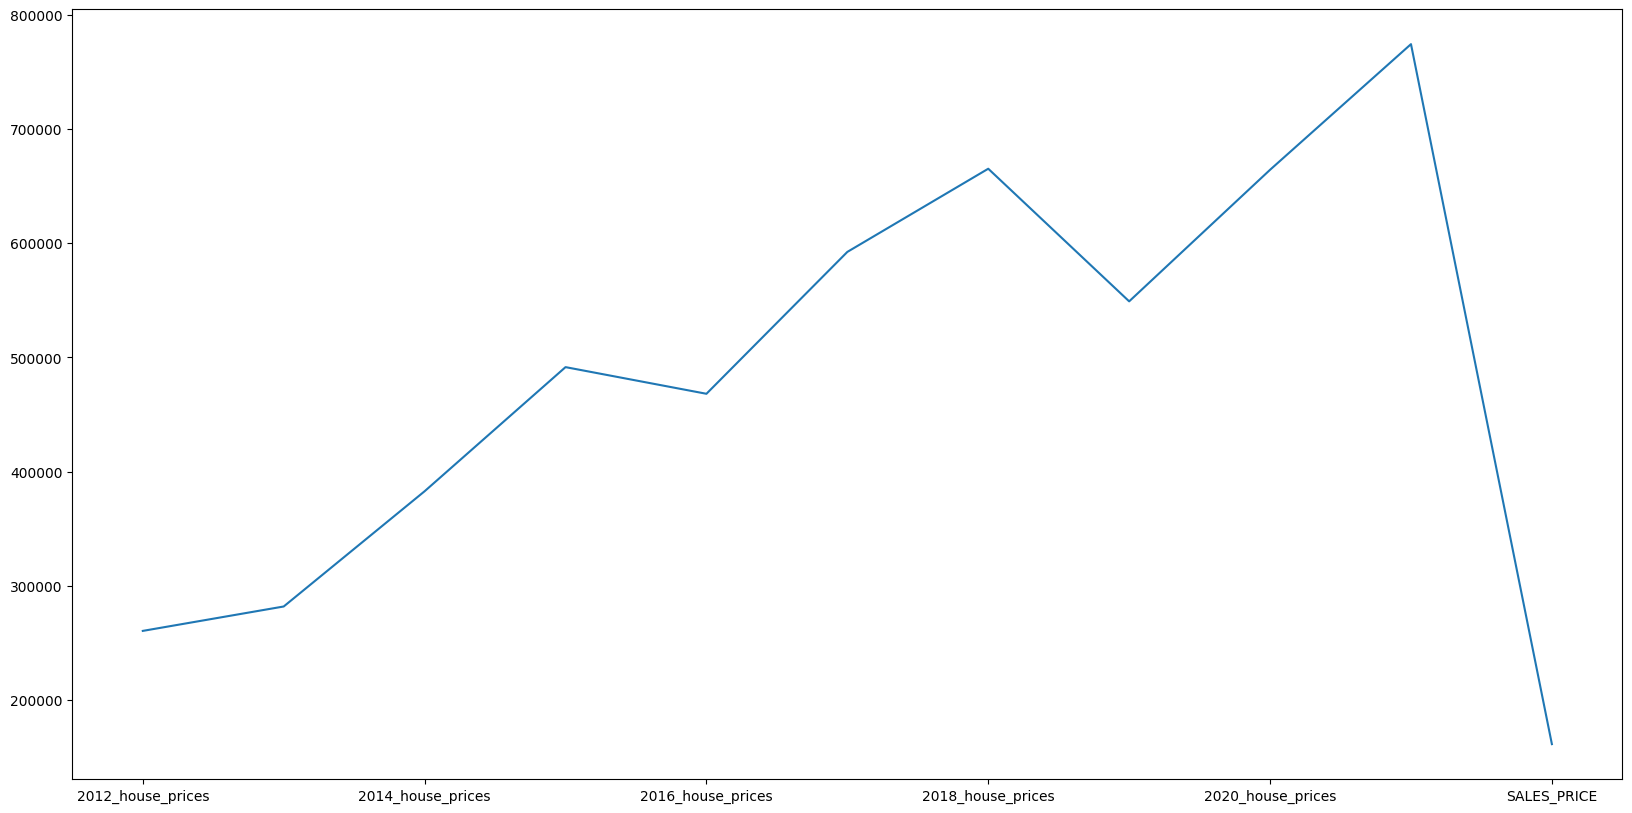

In [15]:
locationInput = input("Enter the name of the town/city, district or county your interested in... \n")
locationInput = locationInput.upper()
inputLocAvg = locationAverages.loc[locationInput] 
display(inputLocAvg)
inputLocAvg.plot(figsize=(20, 10))

In [ ]:
df21_df22 = pd.merge(df22,df21[['POSTCODE','SALES_PRICE']],on='POSTCODE', how='left')       
df21_df22.loc[df21_df22['TOWN/CITY'] == 'ROMFORD']